---
## Optional: Loading-Datasets
Scikit-learn comes with a bunch of small dataset. They were downloaded when you installed the library. Additionally sklearn offers a utility for directly downloading datasets from the OpenML database, in an sklearn-friendly format. In a future lecture, we will also see how to use tensorflow for loading data (which is probably more likely to be part of an actual future workflow of yours). Nevertheless, if you need data for an ML-task that is not neural network related, or just as a showcase, sklearn has some nice options: https://scikit-learn.org/stable/datasets.html

### Preinstalled Datasets
The digits dataset is a smaller (and easier) version of the famous MNIST handwrittten digits dataset. It contains digits written in human handwriting as data and the value of the respective digits as targets. Teaching an machine learning model to read human handwriting is a very typical task in the field of computer vision.

The data will be loaded as a sklearn ``Bunch`` object, which is more or less a fancy dictionary.

<class 'sklearn.utils._bunch.Bunch'> 

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']) 

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different

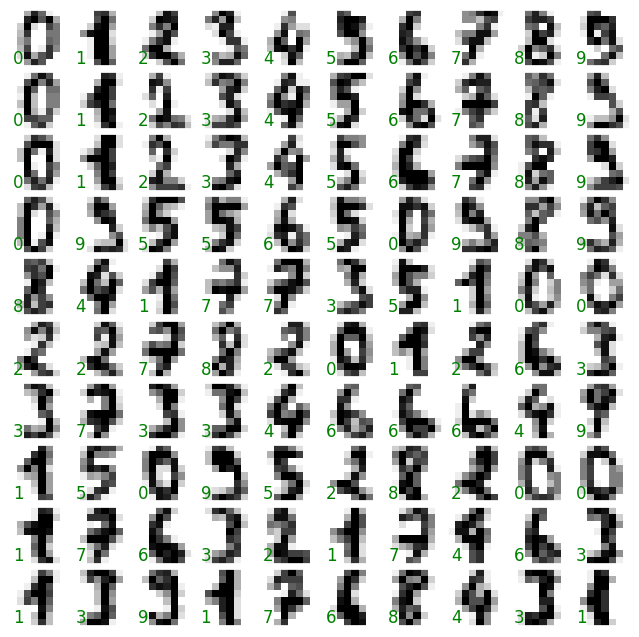

In [32]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

digits = load_digits()

print(type(digits),'\n')
print(digits.keys(),'\n')
print(digits.DESCR)

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Before the training of any machine learning model can start, usually some preprocessing is necessary. The datasets from sklearn are immediately ready to use inside of the library itself. But before we can use it to train something, we still have to split the data into (input-)data and target (also called label or ground-truth). We also want to further split the data in a training and a test set. The test set will then be used to evaluate the performance of our trained model.


Further reading: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

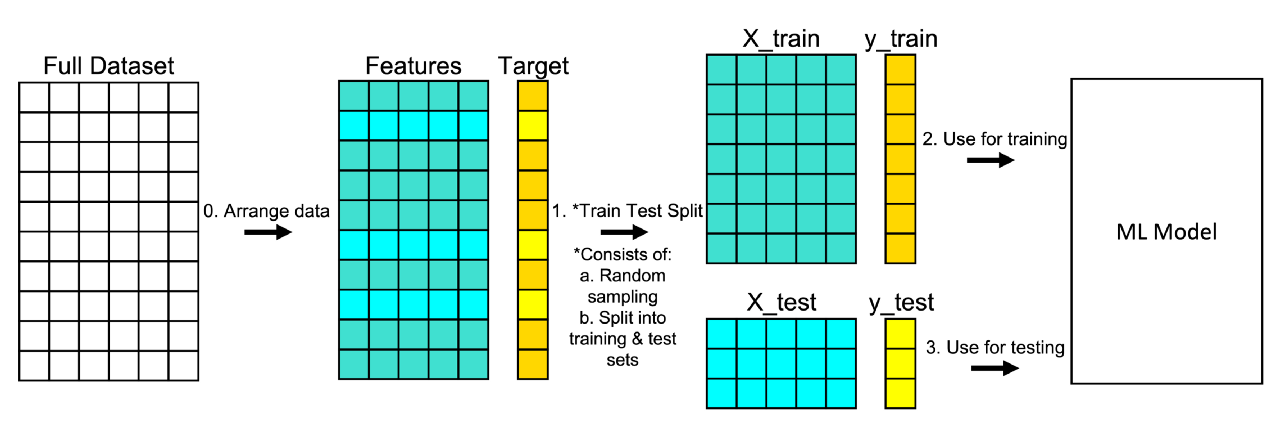
MIT License, Copyright (c) 2020 Michael Galarnyk, https://github.com/mGalarnyk

In [33]:
X = digits.data
y = digits.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0);

The data is used to train a naive Bayes classifier. This classifier is just a (simple) example at this point, so you don't need to wrap your head around that.

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

model prediction: [2]


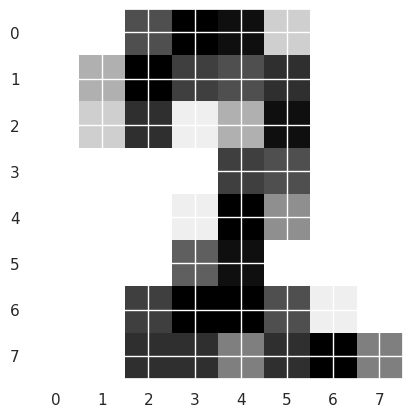

In [35]:
print("model prediction:", model.predict([Xtest[0]]))
plt.imshow(Xtest[0].reshape((8,8)), cmap='binary', interpolation='nearest')

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.825

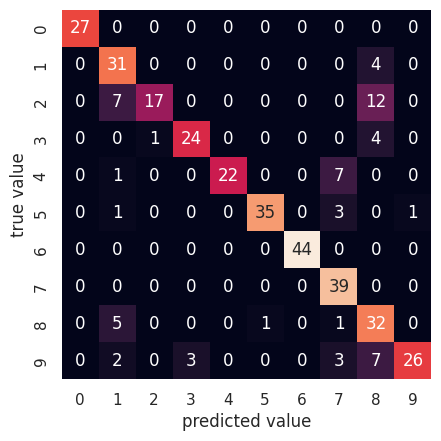

In [37]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Any classifier from scikit-learn can be trained with this data.

In [38]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
accuracy_score(ytest, y_model)

0.9916666666666667

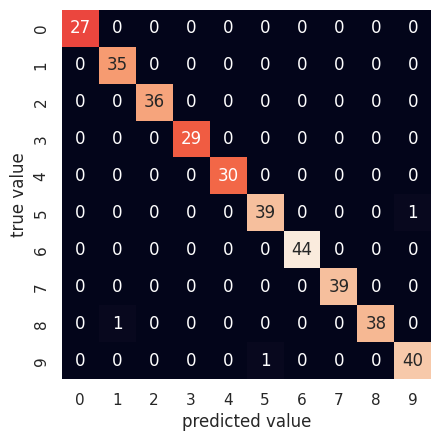

In [39]:
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

### Downloading datasets
Most real datasets are too big to be part of the library itself. Sklearn offers a function for downloading any dataset from [openml.org](https://openml.org/) in a sklearn friendly format. Here we will download the actual MNIST dataset. It contains 70.000 examples, so downloading it might take a bit.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')

/home/carolina/anaconda3/envs/scipy23/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print(mnist.keys(), "\n")
print(mnist.DESCR)

In [1]:
from sklearn.naive_bayes import GaussianNB

X = mnist.data
y = mnist.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

NameError: name 'mnist' is not defined

Accuracy: 0.5402857142857143


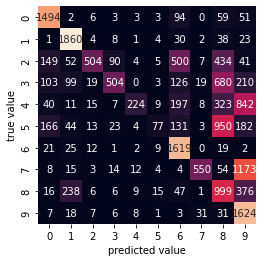

In [11]:
print("Accuracy:", accuracy_score(ytest, y_model))

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('predicted value')
plt.ylabel('true value');